# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [79]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [19]:
# Extract all rows of data
rows = soup.find_all('tr')  # Find all table rows

# Create an empty list to store the data
data_list = []

# Loop through each row and extract data
if row_data:  # Check if the row has data
        data_dict = {
            'id': row_data[0],                # Identification number
            'terrestrial_date': row_data[1],  # Date on Earth
            'sol': row_data[2],                # Number of elapsed sols
            'ls': row_data[3],                 # Solar longitude
            'month': row_data[4],              # Martian month
            'min_temp': row_data[5],           # Minimum temperature in Celsius
            'pressure': row_data[6]            # Atmospheric pressure
        }
        data_list.append(data_dict)

# Print the list to see the extracted data
print(data_list)

[{'id': '1895', 'terrestrial_date': '2018-02-27', 'sol': '1977', 'ls': '135', 'month': '5', 'min_temp': '-77.0', 'pressure': '727.0'}]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [38]:
rows = soup.find_all('tr')  # Find all table rows
scraped_data = []  # Initialize an empty list to hold the scraped data

In [40]:

# Loop through each row and extract data
for row in rows:
    cells = row.find_all('td')  # Find all cells in the row
    if len(cells) > 0:  # Check if the row has data
        data_dict = {
            'id': len(scraped_data) + 1,  # Assign an ID based on the current length of scraped_data
            'terrestrial_date': cells[1].get_text(),  # Date on Earth
            'sol': int(cells[2].get_text()),  # Number of elapsed sols
            'ls': int(cells[3].get_text()),  # Solar longitude
            'month': int(cells[4].get_text()),  # Martian month
            'min_temp': float(cells[5].get_text()),  # Minimum temperature in Celsius
            'pressure': float(cells[6].get_text())  # Atmospheric pressure
        }
        scraped_data.append(data_dict)  # Append the dictionary to the list

In [42]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_weather_df = pd.DataFrame(scraped_data)

# Print the DataFrame to see the result
print(mars_weather_df)

        id terrestrial_date   sol   ls  month  min_temp  pressure
0        1       2012-08-16    10  155      6     -75.0     739.0
1        2       2012-08-17    11  156      6     -76.0     740.0
2        3       2012-08-18    12  156      6     -76.0     741.0
3        4       2012-08-19    13  157      6     -74.0     732.0
4        5       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1863       2018-02-23  1973  133      5     -78.0     730.0
1863  1864       2018-02-24  1974  134      5     -77.0     729.0
1864  1865       2018-02-25  1975  134      5     -76.0     729.0
1865  1866       2018-02-26  1976  135      5     -77.0     728.0
1866  1867       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


In [50]:
# Confirm DataFrame was created successfully
print(mars_weather_df)


        id terrestrial_date   sol   ls  month  min_temp  pressure
0        1       2012-08-16    10  155      6     -75.0     739.0
1        2       2012-08-17    11  156      6     -76.0     740.0
2        3       2012-08-18    12  156      6     -76.0     741.0
3        4       2012-08-19    13  157      6     -74.0     732.0
4        5       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1863       2018-02-23  1973  133      5     -78.0     730.0
1863  1864       2018-02-24  1974  134      5     -77.0     729.0
1864  1865       2018-02-25  1975  134      5     -76.0     729.0
1865  1866       2018-02-26  1976  135      5     -77.0     728.0
1866  1867       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [52]:
# Examine data type of each column
data_types = mars_weather_df.dtypes

In [54]:
print(data_types)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


In [56]:
# Confirm type changes were successful by examining data types again
print(data_types)

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [58]:
# 1. How many months are there on Mars?
# Count the number of unique months in the DataFrame
num_months = mars_weather_df['month'].nunique()
# Print the result
print(f'There are {num_months} months on Mars.')

There are 12 months on Mars.


In [60]:
# 2. How many sols (Martian days) worth of data are there?
# Count the number of rows in the DataFrame to get the number of sols
num_sols = mars_weather_df.shape[0]
print(f'There are {num_sols} sols (Martian days) worth of data.')

There are 1867 sols (Martian days) worth of data.


In [14]:
# 3. What is the average minimum temperature by month?


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


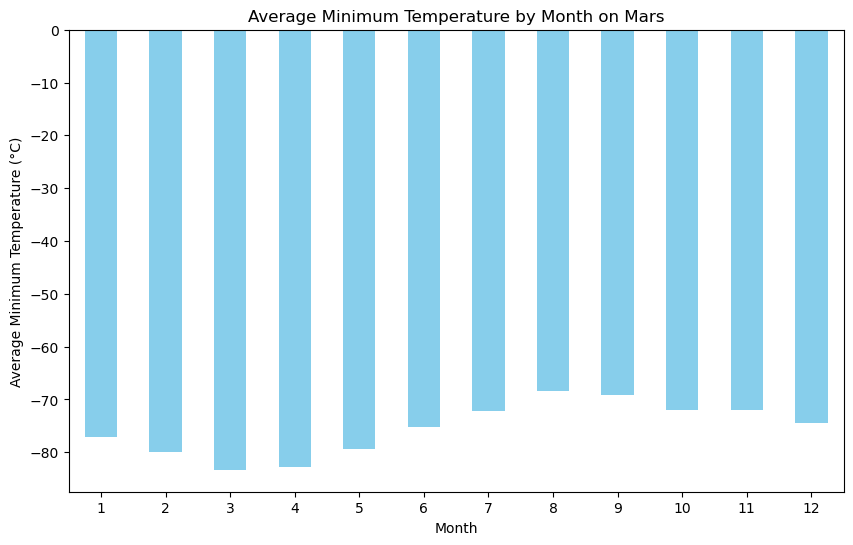

In [62]:
# Plot the average minimum temperature by month
average_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()
#  Plotting the average minimum temperature by month
plt.figure(figsize=(10, 6))
average_min_temp.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

The coldest month is Month 3 with an average minimum temperature of -83.31 °C.
The hottest month is Month 8 with an average minimum temperature of -68.38 °C.


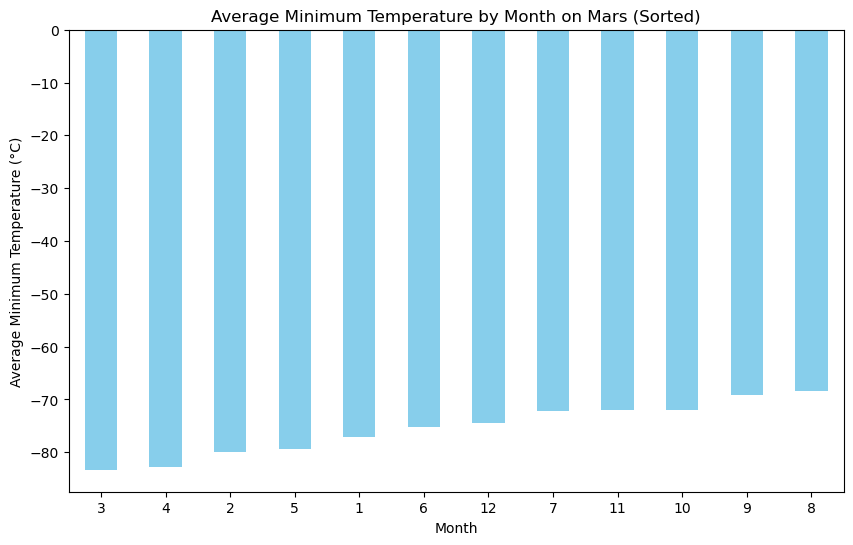

In [64]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Group by month and calculate the average minimum temperature
average_min_temp = mars_weather_df.groupby('month')['min_temp'].mean()

#  Sort the average minimum temperatures
sorted_avg_min_temp = average_min_temp.sort_values()

# Identify the coldest and hottest months
coldest_month = sorted_avg_min_temp.index[0]
hottest_month = sorted_avg_min_temp.index[-1]
coldest_temp = sorted_avg_min_temp.iloc[0]
hottest_temp = sorted_avg_min_temp.iloc[-1]

# Print the results
print(f'The coldest month is Month {coldest_month} with an average minimum temperature of {coldest_temp:.2f} °C.')
print(f'The hottest month is Month {hottest_month} with an average minimum temperature of {hottest_temp:.2f} °C.')

# Plotting the sorted average minimum temperature by month
plt.figure(figsize=(10, 6))
sorted_avg_min_temp.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Average Minimum Temperature by Month on Mars (Sorted)')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [66]:
# 4. What is the average pressure by month?
# Group by month and calculate the average pressure
average_pressure = mars_weather_df.groupby('month')['pressure'].mean()

# Print the average pressure by month
print("Average Pressure by Month (in Pascals):")
print(average_pressure)



Average Pressure by Month (in Pascals):
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


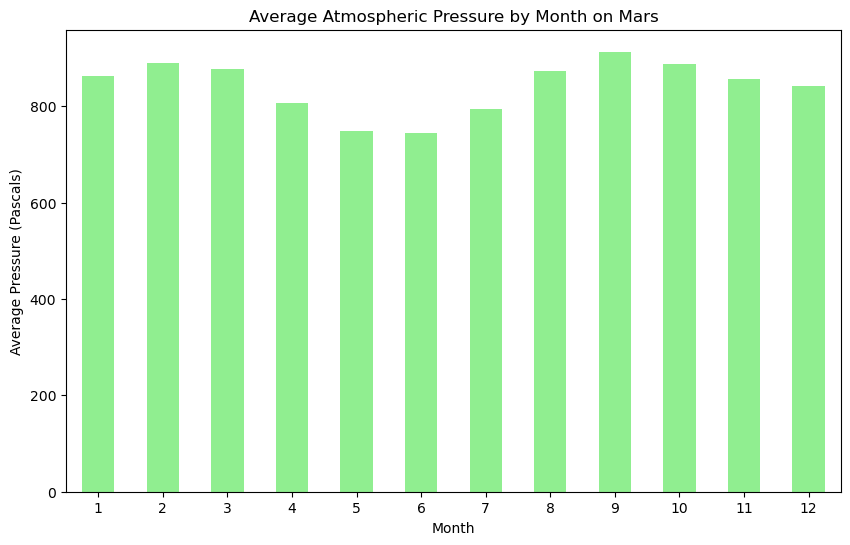

In [68]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))
average_pressure.plot(kind='bar', color='lightgreen')

# Adding titles and labels
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Pressure (Pascals)')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

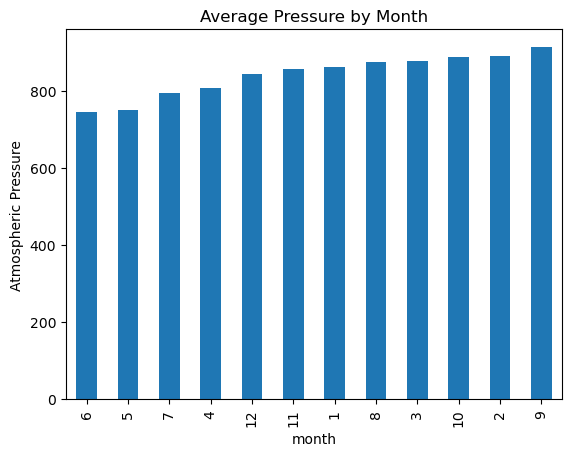

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph


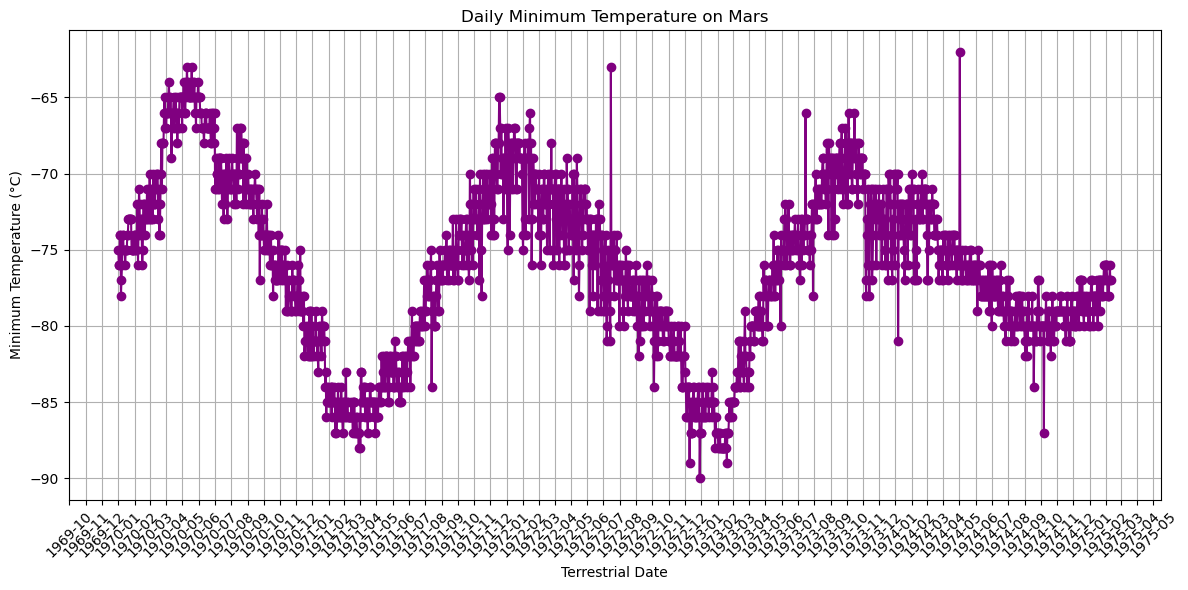

In [81]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Plotting the daily minimum temperature of each observation
plt.figure(figsize=(12, 6))
plt.plot(mars_weather_df['terrestrial_date'], mars_weather_df['min_temp'], marker='o', linestyle='-', color='purple')

# Adding titles and labels
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')

# Formatting the x-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Optional: Set major locator and formatter for better date representation
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show ticks for each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date

# Adding grid and layout adjustments
plt.grid()
plt.tight_layout()  # Adjust layout to make room for the rotated x labels

# Show the plot
plt.show()

#### Minimum Temperature
Average Minimum Temerature on mars is lowest on the 3rd month, and highest on the 8th month. 


#### Atmospheric Pressure

Highest Average Atmospheric pressure is on the 9th month and it is at approximately 850 and lowest is in June and May at about 760 atmospheric pressure. 

#### Year Length
in 2 terrestrial date years the tempreture completes its cycle. For example 1971-03 we see lowest temerature around -88C it doesn't drop to that temperature until the end of year 1972 


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [83]:
# Write the data to a CSV
# Specify the filename for the CSV file
csv_filename = 'mars_weather_data.csv'

# Write the DataFrame to a CSV file
mars_weather_df.to_csv(csv_filename, index=False)

# Print a confirmation message
print(f'Data has been written to {csv_filename}')

Data has been written to mars_weather_data.csv


In [ ]:
browser.quit()